This Notebook trains a deep learning model using CNN (Convolutional Neural Network) to recognize MNIST digits from 0 to 9.

In [1]:
import pandas as pd
import numpy as np

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

# Load the data

In [2]:
train_data = pd.read_csv('../input/digit-recognizer/train.csv')
test_data = pd.read_csv('../input/digit-recognizer/test.csv')

train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Separate the label and features 

In [3]:
y_train = train_data['label']
x_train = train_data.drop(['label'], axis=1)

del train_data

# Plot the data

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

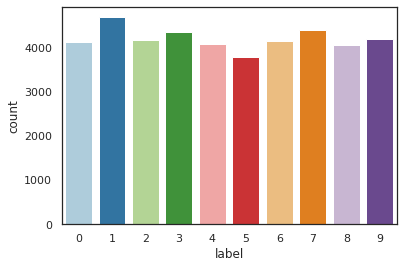

In [4]:
import seaborn as sns

sns.set(style='white', context='notebook', palette='Paired')

sns.countplot(y_train)

y_train.value_counts()

From the plotting, it is clear that the data is balanced, hence we can proceed further.

# Handle null values or missing values 

In [5]:
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
test_data.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

No null values or missing values, hence move on..

# Normalization

Normalization is an important step while training deep learning model. The model converges faster. Dividing by 255 is called grayscale normalization which helps in reducing the effect of illumination difference among various images.

In [7]:
x_train = x_train / 255.0
test_data = test_data / 255.0

x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Reshaping

converting images from 1D vector to 3D vector of shape (28 , 28, 1), where the 3rd dimension shows the color (channel) RGB. MNIST images are grayscale thats why we are taking it as 1.

In [8]:
x_train = x_train.values.reshape(-1, 28 , 28, 1)
test_data = test_data.values.reshape(-1, 28 , 28, 1)

In [9]:
test_data.shape

(28000, 28, 28, 1)

In [10]:
x_train.shape

(42000, 28, 28, 1)

# Encode the y_train (labels) 

In [11]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes = 10)

In [12]:
y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Split the data into training and validation sets

In [13]:
from sklearn.model_selection import train_test_split

random_seed = 4

x, x_val, y, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=random_seed)

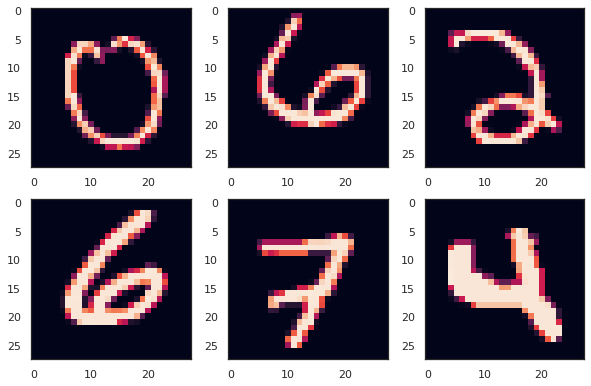

In [14]:
import matplotlib.pyplot as plt

# Some examples
plt.figure(figsize=(10, 10))

for i in range(6):  
    plt.subplot(3, 3, i+1)
    plt.imshow(x[i][:,:,0])
    

# Model Architecture 

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [16]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

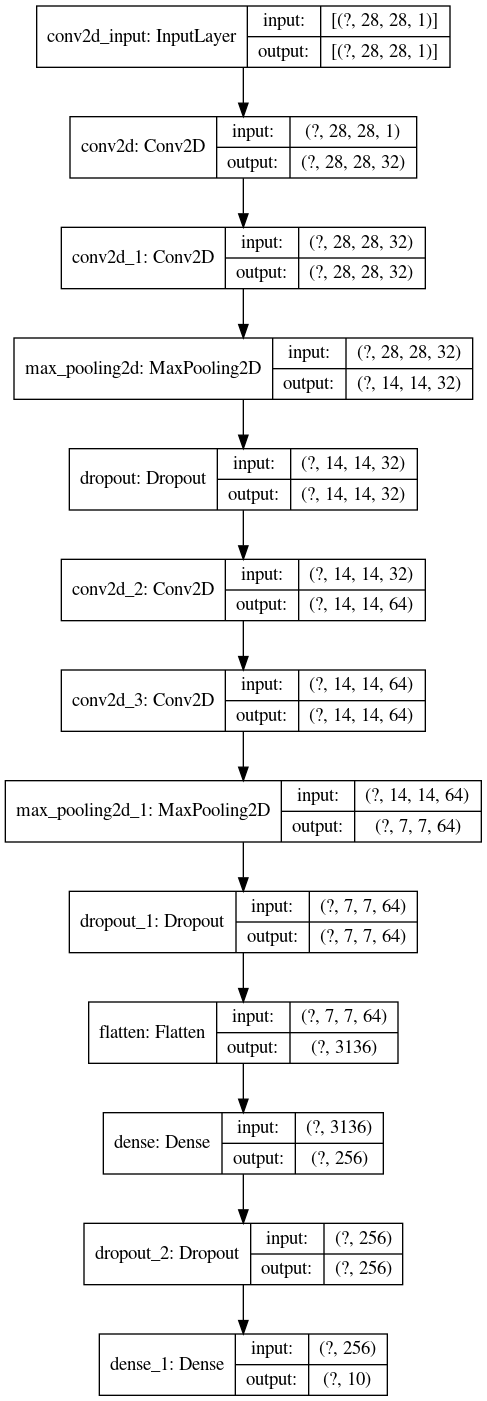

In [17]:
plot_model(model, show_shapes=True)

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

ReduceLROnPlateau reduces overfitting, it simply reduces the learning rate by a factor of 0.5 (i.e. half) whenever there is no improvement in the monitored value (here, validation accuracy) after three (patience) epochs.

ModelCheckpoint saves the model whenever it sees the monitored value (here, validation loss) is minimum (mode) than the previous model.

In [19]:
filepath = './model-ep{epoch:02d}-loss{loss:.3f}-val_loss{val_loss:.3f}_acc{accuracy:.3f}.h5'
callbacks = [   
             ReduceLROnPlateau(monitor='val_acc', 
                                patience=3, 
                                verbose=1, 
                                factor=0.5, 
                                min_lr=0.00001),          
            ModelCheckpoint(filepath= filepath, save_best_only = True, monitor='val_loss', mode='min')
            ]

In [20]:
EPOCHS = 20

history = model.fit(x,  
                    y,              
                    verbose = 1,            
                    epochs = EPOCHS, 
                    validation_data=(x_val, y_val),
                   callbacks = callbacks)

Epoch 1/20
1182/1182 [==============================] - 6s 5ms/step - loss: 0.2083 - accuracy: 0.9336 - val_loss: 0.0637 - val_accuracy: 0.9814
Epoch 2/20
1182/1182 [==============================] - 5s 5ms/step - loss: 0.0751 - accuracy: 0.9778 - val_loss: 0.0464 - val_accuracy: 0.9850
Epoch 3/20
1182/1182 [==============================] - 5s 5ms/step - loss: 0.0565 - accuracy: 0.9829 - val_loss: 0.0355 - val_accuracy: 0.9886
Epoch 4/20
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0480 - accuracy: 0.9853 - val_loss: 0.0411 - val_accuracy: 0.9883
Epoch 5/20
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0422 - accuracy: 0.9872 - val_loss: 0.0339 - val_accuracy: 0.9895
Epoch 6/20
1182/1182 [==============================] - 5s 5ms/step - loss: 0.0344 - accuracy: 0.9899 - val_loss: 0.0304 - val_accuracy: 0.9898
Epoch 7/20
1182/1182 [==============================] - 5s 5ms/step - loss: 0.0332 - accuracy: 0.9900 - val_loss: 0.0429 - val_accuracy:

# Plot the validation loss and training loss

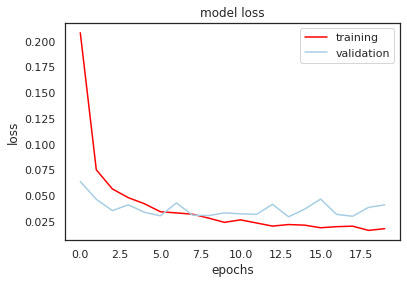

In [21]:
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

# Evaluate the model 

Test the model's performance on test dataset. I am using the highest accuracy model (last model) rather than the low validation loss model.

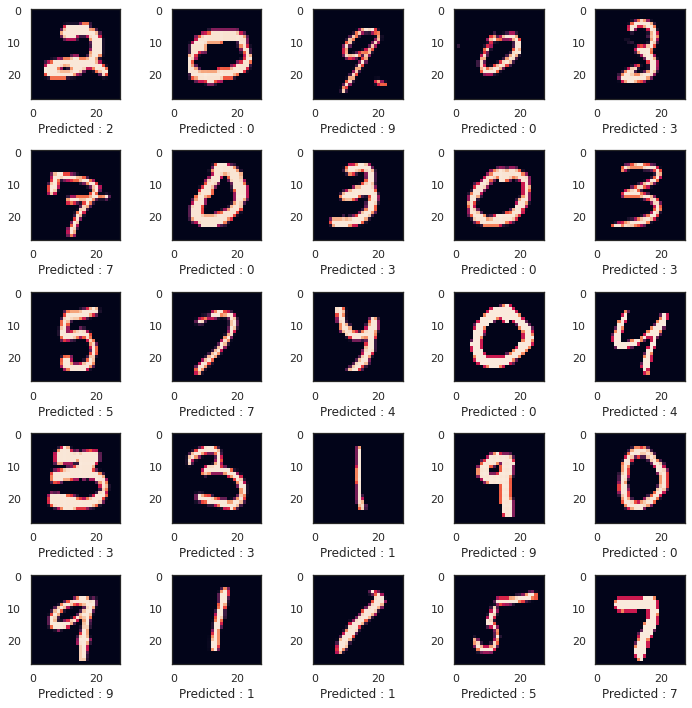

In [40]:
rows = 5
cols = 5

plt.figure(figsize=(10,10))
for index in range(rows*cols):
    img = test_data[index].reshape(1, 28, 28, 1)
    pred = np.argmax(model.predict(img))
    plt.subplot(rows, cols, index+1)
    plt.imshow(test_data[index][:,:,0])
    plt.xlabel('Predicted : {}'.format(pred))

plt.tight_layout()
plt.show()

# Submission

In [63]:
results =[]
for index in range(28000):
    img = test_data[index].reshape(1, 28, 28, 1)
    pred = np.argmax(model.predict(img))
    results.append(pred)

In [64]:
submission = pd.DataFrame()
submission['ImageId'] = [i for i in range(1, 28001)]
submission['Label'] = results

In [66]:
submission.to_csv('my_submission.csv', index=False)

## Next we will use transfer learning to make classifier and will check whether it performed better than our architecture or not.